# 패션MNIST - 다중 분류 문제

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### 데이터 로딩 및 확인

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [8]:
type(train_images)

numpy.ndarray

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

### 데이터 전처리
- 픽셀값 범위 : 0 ~ 255

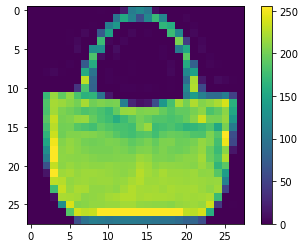

In [16]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images / 255
test_images = test_images / 255

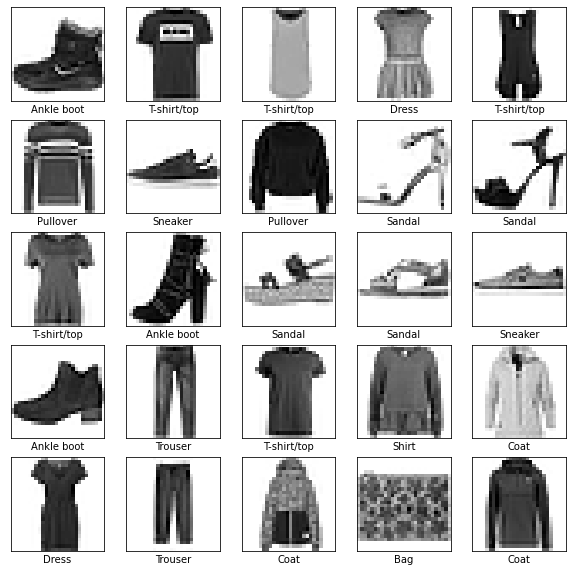

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 모델 구성

*층 설정
 - keras.layers.Flatten : 2차원 배열(28*28)을 1차원 배열(784)로 변환, 가중치 없음, 데이터만 변환
 - keras.layers.Dense(128) : 밀집연결 또는 완전연결층, 128개의 뉴런
 - keras.layers.Dense(10) : 10개 노드, 소프트맥스층, 10개의 확률을 반환하고 전체 합은 1

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### 모델 컴파일
 - 손실함수 훈련하는 동안 모델의 오차 최소화
 - 옵티마이저-데이터와 손실함수를 바탕으로 모델의 업데이트 방법 결정
 - 지표(Metric)-훈련단계와 테스트 단계를 모니터링하기 위해 사용, 정확도를 사용

In [28]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4931 - accuracy: 0.8267
Epoch 2/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3692 - accuracy: 0.8661
Epoch 3/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3357 - accuracy: 0.8776
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3096 - accuracy: 0.8862
Epoch 5/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2936 - accuracy: 0.8920


In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

10000/10000 - 1s - loss: 0.3538 - accuracy: 0.8722

테스트 정확도: 0.8722


### 예측 만들기

In [31]:
pred = model.predict(test_images)

In [32]:
pred[0]

array([1.6256000e-06, 1.4544689e-09, 1.2125148e-06, 1.3325826e-08,
       1.0179771e-06, 2.1884462e-02, 2.0156658e-06, 1.3053437e-01,
       2.0165513e-05, 8.4755510e-01], dtype=float32)

In [33]:
np.argmax(pred[0])

9

In [34]:
test_labels[0]

9

- 10개 클래스에 대한 예측을 모두 그래프로 표현

In [35]:
def plot_image(i, pred_array, true_label, img):
    pred_array, true_label, img = pred_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    pred_label = np.argmax(pred_array)
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label],
                                        100*np.max(pred_array),
                                        class_names[true_label]),
              color=color)
    
def plot_value_array(i, pred_array, true_label):
    pred_array, true_label = pred_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_array, color="#777777")
    plt.ylim([0, 1])
    pred_label = np.argmax(pred_array)

    thisplot[pred_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

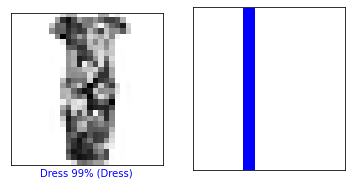

In [38]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

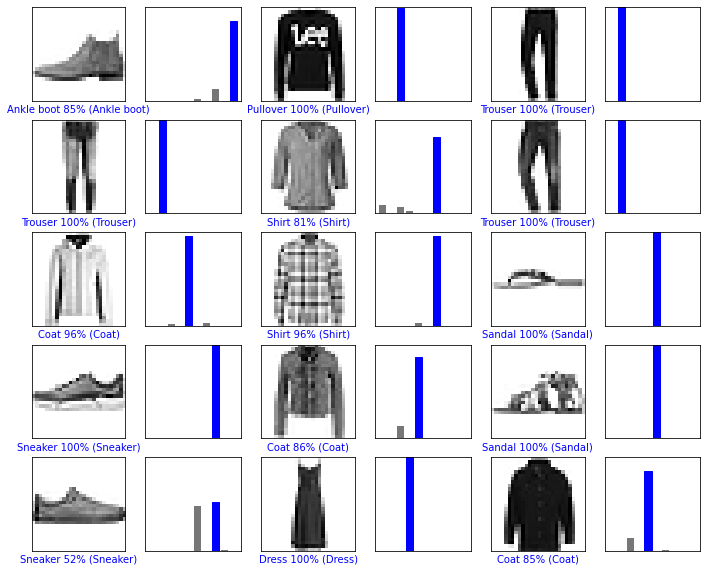

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

In [45]:
img = test_images[0]

print(img.shape)

(28, 28)


In [46]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [47]:
pred_single = model.predict(img)
print(pred_single)

[[1.6256026e-06 1.4544768e-09 1.2125190e-06 1.3325872e-08 1.0179788e-06
  2.1884490e-02 2.0156654e-06 1.3053462e-01 2.0165546e-05 8.4755486e-01]]


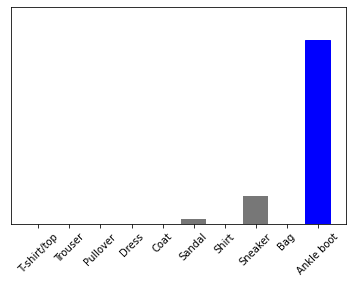

In [52]:
plot_value_array(0, pred_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
